In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.datacollection import DataCollector
import pandas as pd
import random

In [3]:
df_infl = pd.read_csv("inflationp2.csv")
INFLATON = [inflation / 12 for inflation in df_infl["inflation"] for _ in range(12)]
INFLATON

[0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.122069388,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.13518524808333335,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.009885594666666666,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.10513193383333334,
 0.177509167,
 0.177509167,


In [4]:
#data from https://fred.stlouisfed.org/series/REAINTRATREARAT10Y#0
#the data is the interest rate per month for all 120 months starting from 2013 till the end of 2023

df = pd.read_csv('data_interest_rate.csv')
df2 = df.drop([df.index[120]])
df3 = df2["interest_rate"]

df_inflation = pd.read_csv('inflation_data_real.csv')
df_inflation = df_inflation['Value2']

#global variables

HOUSE_SIZES = ["XS", "S", "M", "L", "XL"]
# location miss veranderen voor staten en evt met dict en kans/ verhouding inwoners erbij -> geen idee hoe.
LOCATIONS_earlier = ["N", "E", "S", "W"]

INTEREST_RATE = list(df3)
#INFLATON = list(df_inflation)

#other option:
LOCATIONS = ["Urban", "Suburban", "Rural"]

# scratch
# for location the following can maybe be used (comes from https://gist.github.com/JeffPaine/3083347):
west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
southwest = ["AZ", "NM", "TX", "OK"]
southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
northeast = ["CT", "DC", "HI", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
hawai_group = ["HI"]
alaska_group =["AK"]
USA_LOCATIONS = [southeast, west, midwest, southwest, northeast, hawai_group, alaska_group]
USA_LOCATION_GENERATE = southeast + west + midwest + southwest + northeast + hawai_group + alaska_group

In [5]:
#Global variables
INTEREST_RATE = list(df3)

#controle data
df_controle = pd.read_csv("AVG_house_price.csv")
df_controle.rename(columns={'observation_date': 'date',
                             'ASPUS': 'Mean Sales Price'}, inplace=True)
CONTROLE = df_controle["Mean Sales Price"]

#Location data
#probabilities are based on data from https://worldpopulationreview.com/states
west = ["CA", "OR", "WA", "NV", "ID", "UT", "CO", "WY", "MT"]
west_prob = [11.57 / 100, 1.26 / 100, 2.33 / 100, 0.96 / 100, 0.59 / 100, 1.03 / 100, 1.76 / 100, 0.17 / 100, 0.34 / 100]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
midwest_prob = [0.23 / 100, 0.28 / 100, 0.59 / 100, 0.88 / 100, 1.72 / 100, 0.96 / 100, 1.85 / 100, 1.77 / 100, 3.73 / 100, 2.05 / 100, 2.99 / 100, 3.52 / 100]
southwest = ["AZ", "NM", "TX", "OK"]
southwest_prob = [2.23 / 100, 0.63 / 100, 9.22 / 100, 1.22 / 100]
southeast = ["AR", "LA", "MS", "TN", "AL", "KY", "GA", "WV", "VA", "NC", "SC", "FL", "MD", "DE"]
southeast_prob = [0.92 / 100, 1.36 / 100, 0.88 / 100, 2.14 / 100, 1.53 / 100, 1.35 / 100, 3.32 / 100, 0.53 / 100, 2.61 / 100, 3.27 / 100, 1.63 / 100, 6.83 / 100, 1.83 / 100, 0.31 / 100]
northeast = ["CT", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
northeast_prob = [1.08 / 100, 0.42 / 100, 2.09 / 100, 0.42 / 100, 2.78 / 100, 5.8 / 100, 3.86 / 100, 0.33 / 100, 0.19 / 100]
hawai_group = ["HI"]
hawai_group_prob = [0.42 / 100]
alaska_group =["AK"]
alaska_group_prob = [0.22 / 100]

#Global variables for location
USA_LOCATIONS = [southeast, west, midwest, southwest, northeast, hawai_group, alaska_group]
USA_LOCATION_GENERATE = southeast + west + midwest + southwest + northeast + hawai_group + alaska_group #locations for generating
USA_LOCATIONS_PROB = southeast_prob + west_prob + midwest_prob + southwest_prob + northeast_prob + hawai_group_prob + alaska_group_prob

In [6]:
# based on information from https://www.home-cost.com/cost-per-sf-by-state/
AVERAGE_COST_PER_SF = {
    'AL': 115, 'AK': 225, 'AZ': 155,
    'AR': 120, 'CA': 300, 'CO': 200,
    'CT': 215, 'DE': 145, 'FL': 155,
    'GA': 140, 'HI': 450, 'ID': 150,
    'IL': 160, 'IN': 130, 'IA': 130,
    'KS': 130, 'KY': 120, 'LA': 120,
    'ME': 200, 'MD': 160, 'MA': 275,
    'MI': 140, 'MN': 200, 'MS': 115,
    'MO': 130, 'MT': 200, 'NE': 130,
    'NV': 190, 'NH': 200, 'NJ': 240,
    'NM': 140, 'NY': 275, 'NC': 140,
    'ND': 130, 'OH': 130, 'OK': 115,
    'OR': 200, 'PA': 160, 'RI': 215,
    'SC': 140, 'SD': 130, 'TN': 155,
    'TX': 150, 'UT': 155, 'VT': 200,
    'VA': 160, 'WA': 200, 'WV': 120,
    'WI': 160, 'WY': 200
}

REGION_DICT = {}
for region_states in USA_LOCATIONS:
    for state in region_states:
        REGION_DICT[state] = region_states
REGION_DICT

{'AR': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'LA': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'MS': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'TN': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'AL': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'KY': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'GA': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'WV': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  'KY',
  'GA',
  'WV',
  'VA',
  'NC',
  'SC',
  'FL',
  'MD',
  'DE'],
 'VA': ['AR',
  'LA',
  'MS',
  'TN',
  'AL',
  

In [7]:
def location_pref(location_person, location_building):
    """Gives 1 back if location is the same, 2 if location is nearby and 3 if none of the two before"""
    temp_var = None
    if location_person == location_building:
        return 1
    else:
        for i in range(len(USA_LOCATIONS)):
            if location_person in USA_LOCATIONS[i]:
                temp_var = i
                break
    if temp_var != None and location_building in USA_LOCATIONS[temp_var]:
        return 2
    return 3

def set_age():
    age_group = np.random.choice(['18-24','25-64','65+'], p=[0.13, 0.69, 0.18])
    if age_group == '18-24':
        return np.random.randint(18, 24)
    elif age_group == '25-64':
        return np.random.randint(25, 64)
    else:
        return np.random.randint(65, 80)

**Plan:**

  Echte situatie van een jaar of 10 proberen te maken.

  Vervolgens die situatie gebruiken om interest rates aan te passen. 

**Hoe?**

  Duidelijke regels hebben voor koop en verkoop.

  Uitbreiden met bijvoorbeeld locatie, type huis, grote huis -> kan miss met score voor voorkeur.

  Hoeveelheid kopers en verkopers kan impact hebben op kosten van huis.

Model

In [8]:
class BuyerAgent(Agent):
    def __init__(self, model, interest_rate_monthly, inflation, mean_salary, mortage_from_calc, age):
        super().__init__(model)

        # assumption people are willing to pay between 30 and 50 % of salary. 
        
        #Us avarage of percentage to mortage in US is around the 25 % according to:
        # https://usafacts.org/data-projects/housing-costs
        mean_percentage = 0.30
        std_percentage = 0.05
        willing_to_pay = np.clip(np.random.normal(mean_percentage, std_percentage), 0.1, 0.6)

        age_group = random.choices(['18-24','25-64','65+'], weights=[0.13, 0.69, 0.18], k=1)[0]
        edu_group = random.choices(['hs', 'ass', 'bac'], weights=[45, 17, 38], k=1)[0]
        if age_group == '18-24':
                age = random.randint(18, 24)
        elif age_group == '25-64':
                age = random.randint(25, 64)
        else:
                age = random.randint(65, 80)
        # # death rates by age data found at: https://www.cdc.gov/nchs/products/databriefs/db492.htm
        # if age in range(18, 24): 
        #     death_rate = 80/100000

        # elif age in range(25, 34):
        #     death_rate = 163.4/100000

        # elif age in range(35, 44):
        #     death_rate = 255.4/100000
            
        # elif age in range(45, 54): 
        #     death_rate = 453.3/100000
        
        # elif age in range(55, 64):
        #     death_rate = 992.1/100000
        
        # elif age in range(65, 74):
        #     death_rate = 1978.7/100000
        
        # elif age in range(75, 84):
        #     death_rate = 4708.2/100000
        
        # else:
        #     death_rate = 14389.6/100000

        # pension calculation found at https://equable.org/pension-basics-how-pension-benefits-are-calculated/
        # average age for a degree found at https://learn.org/articles/normal_age_finish_college.html
        if age_group != '65+':
                if edu_group == 'hs':
                    mean_salary = 42100 * model.inflation / 12
                elif edu_group == 'ass':
                    mean_salary = 50600 * model.inflation / 12
                else:
                    mean_salary = 68500 * model.inflation / 12
        else:
                if edu_group == 'hs':
                    mean_salary = (random.randint(59, 65) - random.randint(17, 18)) * 0.02 * 42100 / 12 * model.inflation
                elif edu_group == 'ass':
                    mean_salary = (random.randint(59, 65) - random.randint(23, 29)) * 0.02 * 50600 / 12 * model.inflation
                else:
                    mean_salary = (random.randint(59, 65) - random.randint(23, 29)) * 0.02 * 68500 / 12 * model.inflation
        std_dev_salary = 1000 #maybe add inflation and growth here too
        #np.clip only gives numbers between the two given numbers, in this case 1000 and 20000
        salary = np.clip(np.random.normal(mean_salary, std_dev_salary), 1000.0, 20000.0)

        
        # M = P * (r * (1 + r)^360) / ((1 + r)^360 - 1) based on https://www.bankrate.com/mortgages/mortgage-calculator/#calculate-mortgage-payment
        # P is principal loan amount, M is monthly payment (here max monthly payment) and r = interest rate monthly
        # Omgerekend = P = M / (r * (1 + r)^360) / ((1 + r)^360 - 1) -> this is already calculated before it comes here.
        M = salary * willing_to_pay
        self.budget = (M * mortage_from_calc)

        #self.preference_size = np.random.choice(HOUSE_SIZES)
        self.preference_location = np.random.choice(USA_LOCATION_GENERATE)

        #variables to keep track of information
        self.months = 0
        self.age = age
        prob_not_bought_before = min(1, self.age / 40)
        self.bought_before = np.random.choice([True, False], p = [prob_not_bought_before, 1 - prob_not_bought_before])
    
    def location_check(self, location_building):
        check_var = location_pref(self.preference_location, location_building)
        if self.bought_before == False:
            if check_var in [1, 2]:
                return True
            else:
                return False
        else:
            if check_var == 1:
                return True
            else:
                return False
    
    def buy_house(self, model):
        """Function that buys a house"""
        chosen_seller = None
        sellers = model.Seller_Agents #[seller for seller in model.Seller_Agents if not seller.house_sold]
        affordable_sellers = [seller for seller in sellers if seller.cost <= self.budget]
        if not affordable_sellers:
            return
        
        # a house is for sure sold if the location and preference and size and preference are the same. Als the budget doesn't differ more than 100000
        #pref_size = self.preference_size
        buy_budget = self.budget
        perfect_combos = [seller for seller in affordable_sellers if self.location_check(seller.location) and abs(seller.cost - buy_budget) <= 10000]
        if perfect_combos:
            chosen_seller = np.random.choice(perfect_combos)   
#         else:
#             alright_combos = [seller for seller in affordable_sellers if abs(LOCATIONS.index(seller.location) - LOCATIONS.index(self.preference_location)) <= 1 and 
#                                 abs(HOUSE_SIZES.index(seller.house_size) - HOUSE_SIZES.index(self.preference_size)) <= 1 and abs(seller.cost - self.budget) <= 10000.0]

#             if alright_combos and np.random.rand() < 0.334:
#                 #only 50 % chance on buying
#                 chosen_seller = np.random.choice(alright_combos)

            #small change a buyer buys something not well fit
        else:
            if affordable_sellers and np.random.rand() > 0.01:
                chosen_seller = np.random.choice(affordable_sellers)
                
        if chosen_seller:
            model.sales_this_month.append(chosen_seller.cost)
            model.existing_houses.append(chosen_seller)
            chosen_seller.months = 0
            model.Seller_Agents.remove(chosen_seller)
            model.Buyer_Agents.remove(self)
            if self in model.Buyer_Agents:
                print("Something went wrong") 

class SellerAgent(Agent):
    def __init__(self, model, inflation, mean_cost, std_cost):
        super().__init__(model)
        #self.cost = np.clip((np.random.normal(mean_cost, std_cost)), 100000, 2000000)
        self.location = np.random.choice(USA_LOCATION_GENERATE)
        self.size = np.clip(np.random.normal(2000, 400), 500, 10000)
        self.cost = AVERAGE_COST_PER_SF[self.location] * self.size * model.inflation * (1 + model.historice_growth_month) ** model.month

        self.orig_cost = self.cost
        #self.house_size = np.random.choice(HOUSE_SIZES)
        self.location = np.random.choice(USA_LOCATION_GENERATE)
        self.months = 0

    def change_cost(self, model, demand_supply_ratio, growth_multiplier):
        base_growth = 0.05 / 12  # Base monthly growth
        if demand_supply_ratio > 1:
            self.cost *= (1 + base_growth * growth_multiplier)
        
        # Adjust downward if unsold for too long
        if self.months > 1 and self.cost > self.orig_cost * 0.6:
            self.cost *= 0.95

class House_Model(Model):
    def __init__(self, number_of_buyers, number_of_sellers, interest_rate, seed=None):
        super().__init__(seed=seed)
        self.interest_rate = interest_rate
        self.historice_growth_month = 0.02 / 12 #maybe use historic data/ real data
        self.inflation = 1
        self.num_sold = 0
        self.month = 1
        #self.Buyer_Agents = [BuyerAgent(self, self.interest_rate, self.inflation, True, mean_salary) for _ in range(self.num_buyers)]
        self.Buyer_Agents = []
        #creation of houses already in posession
        mean_cost = 320000
        std_cost = mean_cost / 3
        self.existing_houses = [SellerAgent(self, self.inflation, mean_cost, std_cost) for _ in range(number_of_sellers)]
        self.Seller_Agents = []

        # Data collector
        self.Mean_Sale_Prices = []
        self.Unsold_houses = []
        self.Number_of_buyers = []
        self.Number_of_houses_sold = []
        self.sales_this_month = []
        # for buyer in self.Buyer_Agents:
        #     buyer.buy_house(self)

    def step(self, interest_rate_step, inflation):
        self.sales_this_month = []
        self.interest_rate = interest_rate_step
        self.inflation *= (1 + inflation / 100)
        self.use_inflation(inflation)
        self.add_agents_per_step()
        self.bought_to_sell()
        
        np.random.shuffle(self.Buyer_Agents)
        for buyer in self.Buyer_Agents:
            buyer.buy_house(self)

        demand_supply_ratio = len(self.Buyer_Agents) / max(1, len(self.Seller_Agents))
        growth_multiplier = min(1, demand_supply_ratio)
        np.random.shuffle(self.Seller_Agents)
        for seller in self.Seller_Agents:
            seller.change_cost(self, demand_supply_ratio, growth_multiplier)
        self.collect_data()
        self.month += 1

        print(f"Turn {self.month}: Buyers={len(self.Buyer_Agents)}, Sellers={len(self.Seller_Agents)}, Demand/Supply={len(self.Buyer_Agents) / max(1, len(self.Seller_Agents))}")
        print(f"Inflation Factor: {(1 + inflation) * (1 + self.historice_growth_month)}, total inflation = {self.inflation}")
        print(f"Average Buyer Budget: {np.mean([buyer.budget for buyer in self.Buyer_Agents])}")
        print(f"Mean Sale Price: {self.Mean_Sale_Prices[-1] if self.Mean_Sale_Prices else 0}")


    def collect_data(self):
        self.Mean_Sale_Prices.append(self.compute_mean_house_price())
        if self.Mean_Sale_Prices[-1] == 0 and len(self.Mean_Sale_Prices) > 1:
            self.Mean_Sale_Prices[-1] = self.Mean_Sale_Prices[-2]
        self.Unsold_houses.append(self.compute_unsold_inventory())
        self.Number_of_buyers.append(self.compute_num_house_buyers())
        self.Number_of_houses_sold.append(self.compute_num_sold())
    
    def compute_mean_house_price(self):
        if len(self.sales_this_month) > 0:
            return np.mean(self.sales_this_month)  
        else:
            return 0

    def compute_unsold_inventory(self):
        return len(self.Seller_Agents)

    def compute_num_house_buyers(self):
        return len(self.Buyer_Agents)
    
    def compute_num_sold(self):
        return len(self.sales_this_month)
    
    def use_inflation(self, inp_inflation):
        inflation_factor = (1 + inp_inflation / 100) * (1 + self.historice_growth_month)
        buyer_budget = np.array([buyer.budget for buyer in self.Buyer_Agents])
        buyer_budget *= inflation_factor
        for buyer, budget in zip(self.Buyer_Agents, buyer_budget):
            buyer.budget = budget
            buyer.months += 1

        seller_costs = np.array([seller.cost for seller in self.Seller_Agents])
        seller_costs *= inflation_factor
        for seller, cost in zip(self.Seller_Agents, seller_costs):
            seller.cost = cost
            seller.months += 1

        existing_costs = np.array([house.cost for house in self.existing_houses])
        existing_costs *= inflation_factor
        for house, cost in zip(self.existing_houses, existing_costs):
            house.cost = cost

    def add_agents_per_step(self):
        #the past 10 years the searching buyers were more than the number of sellers -> SOURCE!!
        num_extra_buyers = int(0.0130 * len(self.existing_houses) / 12 + 0.5) #assumption  # baseren op groei bevolking
        #during the corona period the supply of new houses went down.
 
        # median us salary is 51940,16 US dollar https://www.multpl.com/us-median-income/table/by-year
        # per month is that 4328,34
        mean_salary = (4328 * (1 + self.inflation / 100)) * (1 + self.historice_growth_month) ** self.month
        monthly_interest_rate = self.interest_rate / 100 / 12
        #assumption paying mortage in 30 years. 30 * 12 = 360 payments
        payments = 360
        mortage_calc = ((1 + monthly_interest_rate)**payments - 1) / (monthly_interest_rate * (1 + monthly_interest_rate)**payments)
        new_Buyer_Agents = [BuyerAgent(self, monthly_interest_rate, self.inflation, mean_salary, mortage_calc, set_age()) for _ in range(num_extra_buyers)]
        self.Buyer_Agents = self.Buyer_Agents + new_Buyer_Agents
        #num_extra_sellers moet nog ergens op gebaseert worden-> gedachte nu: hogere interest rates = duurder lenen = minder huizen gebouwd.
        #Daardoor nu een staandaard/ base rate gepakt en vervolgens op basis van interest rate er iets van af halen of bij optellen 
        
        mean_cost = 320000 * (1 + self.inflation / 100) * (1 + self.historice_growth_month) ** self.month
        std_cost = mean_cost / 3
        num_extra_sellers = int(0.0114 * len(self.existing_houses) / 12 + 0.5)
        if self.month >= 90 and self.month <= 115:
            num_extra_sellers = int( num_extra_sellers * 0.75)
        new_Seller_Agents =  [SellerAgent(self, self.inflation, mean_cost = mean_cost, std_cost = std_cost) for _ in range(num_extra_sellers)]
        self.Seller_Agents = self.Seller_Agents + new_Seller_Agents

    def bought_to_sell(self):
        """Function makes people that once bought a house a seller
        
        HIER MOET NOG DATA VOOR GEVONDEN WORDEN!
            -> Met deze functie kan add_agents_per_step worden veranderd in alleen nieuwe huizen die op de markt komen.

            OOK MOET ER VOOR HET MODEL START AL AGENTS AANGEMAAKT WORDEN DIE AL EEN HUIS HEBBEN.
            WELLICHT OOK PER VERKOOP EXTRA KOPER?

        https://www.census.gov/construction/nrc/pdf/newresconst.pdf and https://ceramicworldweb.com/en/economics-and-markets/another-difficult-year-us-housing-market#:~:text=In%202023%20the%20U.S.%20residential,also%20for%20the%20year%202024. 
        -> aproxamaly 1.4 mil new houses
        122.4 mil households in 2013
        so approx 4 mil houses are resold each year (based on house_sold_2014-2023 png)
        4 / 122.4 =  3,3 % resold
        1.4 / 122.4 = 1.14 % new built each year of original houses there are
        """
        procent_of_people_selling = 0.033 / 12
        num_new_seller = int(procent_of_people_selling * len(self.existing_houses) + 0.5)
        num_new_buyers = num_new_seller
        if self.month >= 90 and self.month <= 115:
            num_new_seller = int( num_new_seller * 0.75)
        for _ in range(num_new_seller):
            new_seller = np.random.choice(self.existing_houses)
            self.Seller_Agents.append(new_seller)
            self.existing_houses.remove(new_seller)
        
        mean_salary = 4328 * (1 + self.inflation / 100) * (1 + self.historice_growth_month) ** self.month
        interest_rate_monthly = self.interest_rate / 100 / 12
        payments = 360
        mortage_calc = ((1 + interest_rate_monthly)**payments - 1) / (interest_rate_monthly * (1 + interest_rate_monthly)**payments)
        new_Buyer_Agents = [BuyerAgent(self, interest_rate_monthly, self.inflation, mean_salary, mortage_calc, set_age()) for _ in range(num_new_buyers)]
        self.Buyer_Agents = self.Buyer_Agents + new_Buyer_Agents

Simulate model with real data input

0
Turn 2: Buyers=25, Sellers=24, Demand/Supply=1.0416666666666667
Inflation Factor: 1.1239395036466666, total inflation = 1.00122069388
Average Buyer Budget: 434370.6394488437
Mean Sale Price: 303296.8110351591
1
Turn 3: Buyers=38, Sellers=36, Demand/Supply=1.0555555555555556
Inflation Factor: 1.1239395036466666, total inflation = 1.0024428778535486
Average Buyer Budget: 436582.63752624026
Mean Sale Price: 302971.90463678725
2
Turn 4: Buyers=44, Sellers=41, Demand/Supply=1.0731707317073171
Inflation Factor: 1.1239395036466666, total inflation = 1.003666553739594
Average Buyer Budget: 435818.62739326595
Mean Sale Price: 307327.2778093706
3
Turn 5: Buyers=46, Sellers=42, Demand/Supply=1.0952380952380953
Inflation Factor: 1.1239395036466666, total inflation = 1.0048917233593044
Average Buyer Budget: 452986.5142199679
Mean Sale Price: 324297.2242006078
4
Turn 6: Buyers=49, Sellers=44, Demand/Supply=1.1136363636363635
Inflation Factor: 1.1239395036466666, total inflation = 1.006118388536071

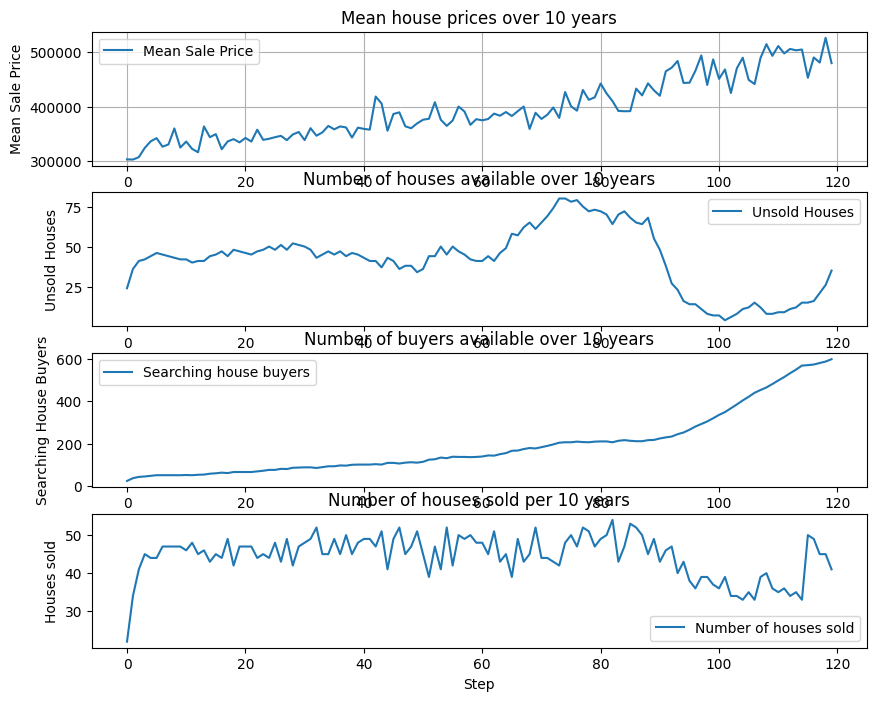

In [9]:
model = House_Model(number_of_buyers = 0, number_of_sellers = 12240, seed = None, interest_rate = INTEREST_RATE[0])
result_list = []
for _ in range(1):
    for i in range(10*12):
        print(i)
        model.step(interest_rate_step = INTEREST_RATE[i], inflation = INFLATON[i])

    results = [model.Mean_Sale_Prices, model.Unsold_houses, model.Number_of_buyers, model.Number_of_houses_sold]
    result_list.append(results)

plt.figure(figsize = (10, 8))

plt.subplot(411)
plt.plot(results[0], label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.legend()

plt.subplot(412)
plt.title("Number of houses available over 10 years")
plt.plot(results[1], label = 'Unsold Houses')
plt.xlabel('Step')
plt.ylabel('Unsold Houses')
plt.legend()

plt.subplot(413)
plt.title("Number of buyers available over 10 years")
plt.plot(results[2], label = 'Searching house buyers')
plt.xlabel('Step')
plt.ylabel('Searching House Buyers')
plt.legend()

plt.subplot(414)
plt.title("Number of houses sold per 10 years")
plt.plot(results[3], label = 'Number of houses sold')
plt.xlabel('Step')
plt.ylabel('Houses sold')
plt.legend()

plt.show()

Compare simulation with the real data

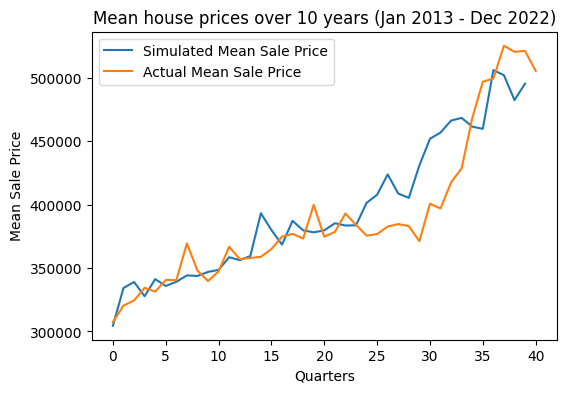

In [11]:
plt.figure(figsize = (6, 4))

controle = pd.read_csv("AVG_house_price.csv")
controle2 = controle["ASPUS"]

def results_to_per_querter(results):
    ds_results = []
    sum_var = 0
    for i in range(len(results[0])):
        sum_var += results[0][i]
        if (i + 1) % 3 == 0:
            ds_results.append(sum_var / 3)
            sum_var = 0
    return ds_results

result_per_qt = results_to_per_querter(results)
plt.plot(result_per_qt, label = 'Simulated Mean Sale Price')
plt.plot(controle2, label = 'Actual Mean Sale Price')
plt.title("Mean house prices over 10 years (Jan 2013 - Dec 2022)")
plt.xlabel('Quarters')
plt.ylabel('Mean Sale Price')
plt.legend()
plt.show()
plt.close()

Simulations with different interest rates

In [ ]:
# interest rate lists for testing the effect of interest rates
INTEREST_RATE_1P_CONST = [1 for _ in range(120)]
INTEREST_RATE_2P_CONST = [2 for _ in range(120)]
INTEREST_RATE_3P_CONST = [3 for _ in range(120)]
INTEREST_RATE_4P_CONST = [4 for _ in range(120)]
INTEREST_RATE_5P_CONST = [5 for _ in range(120)]

In [ ]:
model2 = House_Model(number_of_buyers = 0, number_of_sellers = 122400, seed = None, interest_rate = INTEREST_RATE_1P_CONST[0])

for i in range(10*12):
    #print("check", i)
    model2.step(interest_rate_step = INTEREST_RATE_1P_CONST[i], inflation = INFLATON[i] / 12)

results2 = [model2.Mean_Sale_Prices, model2.Unsold_houses, model2.Number_of_buyers, model2.Number_of_houses_sold]

plt.plot(results2[0], label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

In [ ]:
model3 = House_Model(number_of_buyers = 0, number_of_sellers = 122400, seed = None, interest_rate = INTEREST_RATE_2P_CONST[0])

for i in range(10*12):
    #print("check", i)
    model3.step(interest_rate_step = INTEREST_RATE_2P_CONST[i], inflation = INFLATON[i] / 12)

results3 = [model3.Mean_Sale_Prices, model3.Unsold_houses, model3.Number_of_buyers, model3.Number_of_houses_sold]

plt.plot(results3[0], label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

In [ ]:
model4 = House_Model(number_of_buyers = 0, number_of_sellers = 12240 * 2, seed = None, interest_rate = INTEREST_RATE_3P_CONST[0])

for i in range(10*12):
    #print("check", i)
    model4.step(interest_rate_step = INTEREST_RATE_3P_CONST[i], inflation = INFLATON[i] / 12)

results4 = [model4.Mean_Sale_Prices, model4.Unsold_houses, model4.Number_of_buyers, model4.Number_of_houses_sold]

plt.plot(results4[0], label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

In [ ]:
model5 = House_Model(number_of_buyers = 0, number_of_sellers = 12240 * 2, seed = None, interest_rate = INTEREST_RATE_4P_CONST[0])

for i in range(10*12):
    #print("check", i)
    model5.step(interest_rate_step = INTEREST_RATE_4P_CONST[i], inflation = INFLATON[i] / 12)

results5 = [model5.Mean_Sale_Prices, model5.Unsold_houses, model5.Number_of_buyers, model5.Number_of_houses_sold]

plt.plot(results5[0], label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

In [ ]:
model6 = House_Model(number_of_buyers = 0, number_of_sellers = 12240 * 5, seed = None, interest_rate = INTEREST_RATE_5P_CONST[0])

for i in range(10*12):
    #print("check", i)
    model6.step(interest_rate_step = INTEREST_RATE_5P_CONST[i], inflation = INFLATON[i] / 12)

results6 = [model6.Mean_Sale_Prices, model6.Unsold_houses, model6.Number_of_buyers, model6.Number_of_houses_sold]

plt.plot(results6[0], label = 'Mean Sale Price')
plt.title("Mean house prices over 10 years with 1 % interest rate")
plt.xlabel('Step')
plt.ylabel('Mean Sale Price')
plt.grid(True)
plt.show()
plt.close()

Comparing results of different simulations

In [ ]:
# change results per onth to results per querter to compare it with original data
results_per_qt1 = results_to_per_querter(results)
results_per_qt2 = results_to_per_querter(results2)
results_per_qt3 = results_to_per_querter(results3)
results_per_qt4 = results_to_per_querter(results4)
results_per_qt5 = results_to_per_querter(results5)
results_per_qt6 = results_to_per_querter(results6)

plt.plot(results_per_qt1, label = 'Simulated Mean Sale Price')
plt.plot(results_per_qt2, label = 'Simulated Mean Sale Price with 1 % interest rate constant')
plt.plot(results_per_qt3, label = 'Simulated Mean Sale Price with 2 % interest rate constant')
plt.plot(results_per_qt4, label = 'Simulated Mean Sale Price with 3 % interest rate constant')
plt.plot(results_per_qt5, label = 'Simulated Mean Sale Price with 4 % interest rate constant')
plt.plot(results_per_qt6, label = 'Simulated Mean Sale Price with 5 % interest rate constant')
plt.plot(controle2, label = 'Actual Mean Sale Price')
plt.title("Mean house prices over 10 years (Jan 2013 - Dec 2023)")
plt.xlabel('Quarters')
plt.ylabel('Mean Sale Price')
plt.legend()
plt.show()
plt.close()

In [ ]:
#more clear picture
plt.plot(results_per_qt1, label = 'Simulated Mean Sale Price')
plt.plot(results_per_qt2, label = 'Simulated Mean Sale Price with 1 % interest rate constant')
plt.plot(controle2, label = 'Actual Mean Sale Price')
plt.title("Mean house prices over 10 years (Jan 2013 - Dec 2023)")
plt.xlabel('Quarters')
plt.ylabel('Mean Sale Price')
plt.legend()
plt.show()
plt.close()

In [ ]:
#bar plot for number of houses sold

house_sold_per_year = [0 for _ in range(10)]
for i in range(10):
    for j in range(12):
        house_sold_per_year[i] += results[3][(i + 1) * j] 

plt.bar([i for i in range(10)], house_sold_per_year)
plt.title("Number of houses sold per year")
plt.xlabel('Step')
plt.ylabel('Houses sold')
plt.show()
plt.close()

In [ ]:
plt.hist(results[0])
plt.title("Frequentie of House prices")
plt.xlabel("price")
plt.ylabel("Frequentie")
plt.show()
plt.close()

Real data graphs are below

In [ ]:
#check
controle = pd.read_csv("AVG_house_price.csv")
controle2 = controle["ASPUS"]
plt.plot(controle2)
plt.title("average house price")
plt.show()
plt.close()
plt.plot(df3)
plt.title("Interest rates")
plt.show()
plt.close()

In [ ]:
#check
controle = pd.read_csv("MSPUS.csv")
controle2 = controle["MSPUS"]
plt.plot(controle2)
plt.title("median house price")
plt.show()
plt.close()
plt.plot(df3)
plt.title("Interest rates")
plt.show()
plt.close()